In [ ]:
!pip install fitter

In [ ]:
#common imports to bring into your notebook
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as st

from fitter import Fitter
%matplotlib inline
sns.set(color_codes=True)

In [ ]:
#list of all read ins for sns datasets
df_anscombe=sns.load_dataset("anscombe")
df_attention=sns.load_dataset("attention")
df_brain_networks=sns.load_dataset("brain_networks")
df_car_crashes=sns.load_dataset("car_crashes")
df_diamonds=sns.load_dataset("diamonds")
df_dots=sns.load_dataset("dots")
df_exercise=sns.load_dataset("exercise")
df_flights=sns.load_dataset("flights")
df_fmri=sns.load_dataset("fmri")
df_geyser=sns.load_dataset("geyser")
df_iris=sns.load_dataset("iris")
df_mpg=sns.load_dataset("mpg")
df_penguins=sns.load_dataset("penguins")
df_planets=sns.load_dataset("planets")
df_tips=sns.load_dataset("tips")
df_titanic=sns.load_dataset("titanic")

In [ ]:
datasets_list = sns.get_dataset_names()
print(f"Total number of datasets: {len(datasets_list)}")
datasets_list

Total number of datasets: 22


['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [ ]:
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


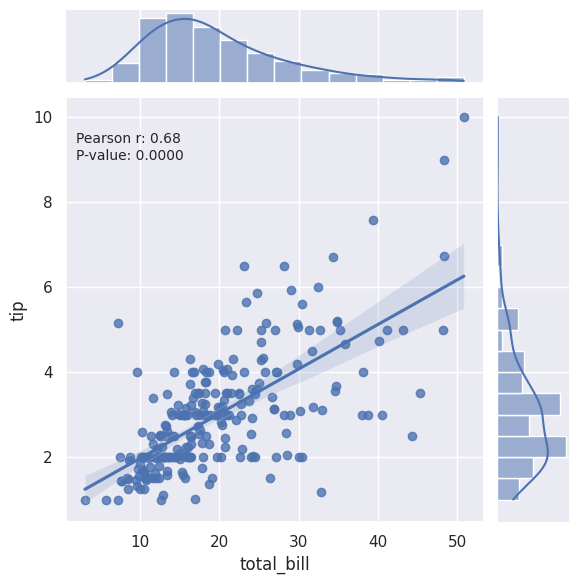

In [ ]:
corr, p_value = st.pearsonr(df_tips["total_bill"], df_tips["tip"])

g = sns.jointplot(x="total_bill", y="tip", data=df_tips, kind="reg")

g.ax_joint.text(
    x=2, y=9,  # Adjust coordinates based on your data
    s=f"Pearson r: {corr:.2f}\nP-value: {p_value:.4f}",
    fontsize=10
)

plt.show()


In [ ]:
data1 = df_tips["total_bill"]

data2 = df_tips["tip"]

In [ ]:
f1 = Fitter(data1)

f2 = Fitter(data2)

In [ ]:
f1.fit()

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
norminvgauss,0.018355,910.114061,924.102734,inf,0.027330,0.991037
genhyperbolic,0.018356,910.220751,927.706592,inf,0.028761,0.984240
moyal,0.018363,904.458601,911.452938,inf,0.028700,0.984584
johnsonsu,0.018386,911.803349,925.792022,inf,0.028888,0.983498
exponnorm,0.018407,904.665791,915.157296,inf,0.026173,0.994715


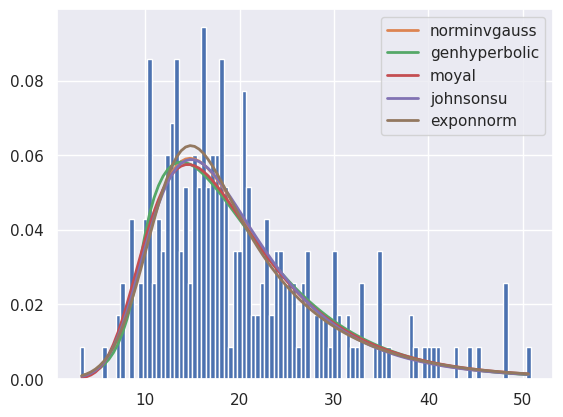

In [ ]:
f1.summary()

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
laplace_asymmetric,4.109101,657.191641,667.683146,inf,0.114706,0.002975
dgamma,4.118580,849.131755,859.623260,inf,0.105588,0.008013
recipinvgauss,4.215404,674.987450,685.478955,inf,0.086255,0.049893
fatiguelife,4.215499,674.345158,684.836663,inf,0.086866,0.047358
johnsonsb,4.215756,675.528355,689.517028,inf,0.086806,0.047601


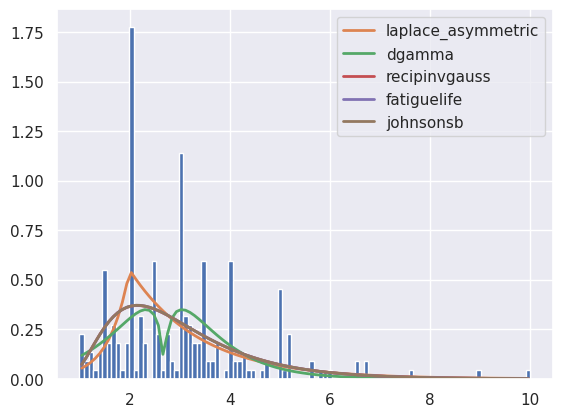

In [ ]:
f2.fit()
f2.summary()

In [ ]:
#begin to standardize bill and tip data, to compare themon a singular, standart, scale
mean_bill = df_tips["total_bill"].mean()
stdev_bill = df_tips["total_bill"].std(ddof=1)

mean_tip = df_tips["tip"].mean()
stdev_tip = df_tips["tip"].std(ddof=1)
mean_bill, stdev_bill

(19.78594262295082, 8.902411954856856)

In [ ]:
df_tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
df_tips["Stand_Bill"] = (df_tips["total_bill"]- mean_bill) / stdev_bill

In [ ]:
df_tips.head(5)

,total_bill,tip,sex,smoker,day,time,size,Stand_Bill
0,16.99,1.01,Female,No,Sun,Dinner,2,-0.314066
1,10.34,1.66,Male,No,Sun,Dinner,3,-1.061054
2,21.01,3.50,Male,No,Sun,Dinner,3,0.137497
3,23.68,3.31,Male,No,Sun,Dinner,2,0.437416
4,24.59,3.61,Female,No,Sun,Dinner,4,0.539635


In [ ]:
df_tips["Stand_Tip"] = (df_tips["tip"]- mean_tip) / stdev_tip

In [ ]:
df_tips

,total_bill,tip,sex,smoker,day,time,size,Stand_Bill,Stand_Tip
0,16.99,1.01,Female,No,Sun,Dinner,2,-0.314066,-1.436993
1,10.34,1.66,Male,No,Sun,Dinner,3,-1.061054,-0.967217
2,21.01,3.50,Male,No,Sun,Dinner,3,0.137497,0.362610
3,23.68,3.31,Male,No,Sun,Dinner,2,0.437416,0.225291
4,24.59,3.61,Female,No,Sun,Dinner,4,0.539635,0.442111
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1.038377,2.111622
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.830568,-0.721488
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.323964,-0.721488
242,17.82,1.75,Male,No,Sat,Dinner,2,-0.220833,-0.902171


((array([-2.7660794 , -2.46319801, -2.29114787, -2.16825434, -2.07137443,
         -1.99075074, -1.9213089 , -1.86005848, -1.80508277, -1.75507658,
         -1.70910939, -1.66649348, -1.62670558, -1.58933792, -1.55406631,
         -1.52062855, -1.48880944, -1.45843008, -1.42934008, -1.40141172,
         -1.37453559, -1.34861722, -1.32357442, -1.29933525, -1.27583633,
         -1.25302156, -1.230841  , -1.20924999, -1.18820845, -1.16768023,
         -1.14763264, -1.12803597, -1.10886319, -1.09008958, -1.07169252,
         -1.0536512 , -1.03594646, -1.01856064, -1.00147737, -0.98468148,
         -0.96815887, -0.95189643, -0.93588192, -0.9201039 , -0.90455168,
         -0.88921522, -0.87408512, -0.85915251, -0.84440907, -0.82984693,
         -0.81545867, -0.80123728, -0.78717613, -0.77326892, -0.75950968,
         -0.74589275, -0.73241275, -0.71906453, -0.70584322, -0.69274417,
         -0.67976291, -0.66689521, -0.65413699, -0.64148438, -0.62893363,
         -0.61648119, -0.60412361, -0.

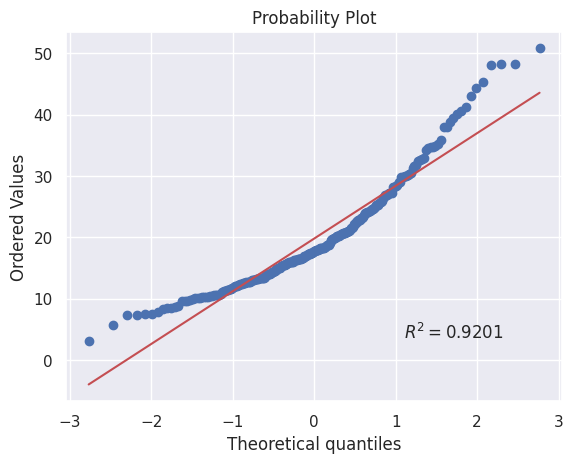

In [ ]:
st.probplot(df_tips["total_bill"], dist = "norm", fit=True, rvalue=True, plot = plt)

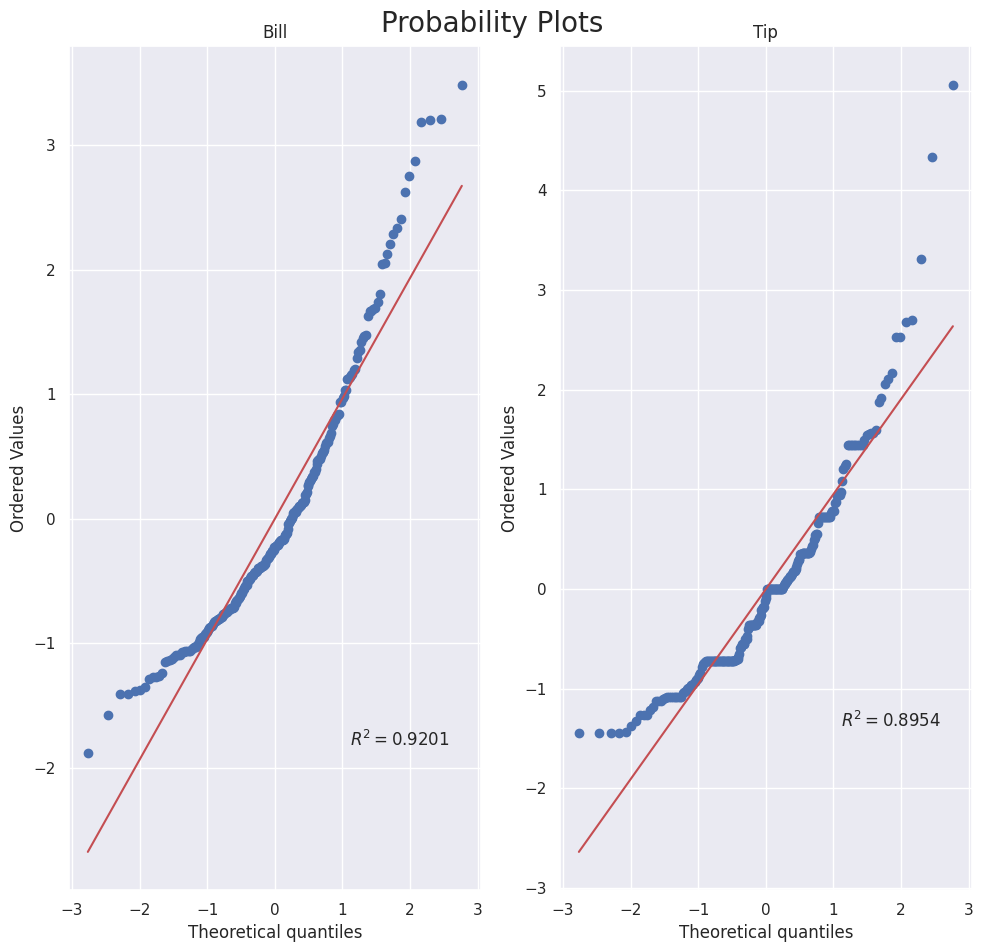

In [ ]:
fig = plt.figure(figsize=(10,10))

ax1 = plt.subplot(121)
res = st.probplot(df_tips["Stand_Bill"],  dist = "norm", fit=True, rvalue=True, plot = plt)
ax1.set_title("Bill")


ax2 = plt.subplot(122)
res = st.probplot(df_tips["Stand_Tip"],  dist = "norm", fit=True, rvalue=True, plot = plt)
ax2.set_title("Tip")

plt.suptitle("Probability Plots", y = 0.95, fontsize=20)
plt.tight_layout()

In [ ]:
df_diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [ ]:
df_diamonds["cut"].value_counts()

,count
cut,
Ideal,21551
Premium,13791
Very Good,12082
Good,4906
Fair,1610


In [ ]:
import statsmodels.api as sm
from statsmodels.stats.proportion import proportion_confint
from statsmodels.stats.proportion import proportions_ztest

In [ ]:
#ALPHA = 1 - CI%
# 0.05 = 1 - 0.95

In [ ]:
proportion_confint(count =21551 , nobs =53940 , alpha = 0.05)

(0.39540305804708686, 0.4036699860760129)

We are 95% confident that the true value of the population proportion of diamonds that are "ideal" in their cut is between 39.54% and 40.37%.

In [ ]:
#always consider alpha of 0.05
#claim from expert is that at least 40% of diamonds are ideal cut.
#alternative: "two-sided" , "smaller", "larger"

#Ho: = 0.40
#Ha: not =   , <     , >
proportions_ztest(count =21551 , nobs = 53940, value = 0.40, alternative= "smaller")

#output is going to be; value of the test statistic...second is the p-value

(-0.21976726150576256, 0.4130262089157087)

Since the Pvalue of 0.000000___146 is less than 0.05, we reject the null hypothesis. Thus, we have sufficient evidence to say that the true proportion of diamonds that are "ideal" cut is less than 42%.

In [ ]:
def two_proprotions_confint(success_a, size_a, success_b, size_b, significance):

    prop_a = success_a / size_a
    prop_b = success_b / size_b
    var = prop_a * (1 - prop_a) / size_a + prop_b * (1 - prop_b) / size_b
    se = np.sqrt(var)

    # z score also called a critical value
    confidence = 1 - significance
    z = st.norm(loc = 0, scale = 1).ppf(confidence + significance / 2)

    # standard formula for the to calculate a confidence interval
    # point-estimtate (p hat) +  & -  z * the standard-error
    prop_diff = prop_b - prop_a
    confint = prop_diff + np.array([-1, 1]) * z * se
    return prop_diff, confint

In [ ]:
prop_diff, confint = two_proprotions_confint(13791, 53940, 12082, 53940, 0.05)
print("Est.Diff.:", prop_diff)
print("Conf. Int.:", confint)

Est.Diff.: -0.03168335187245086
Conf. Int.: [-0.03677568 -0.02659102]


Prop A was Premium, Prop B was Very Good

PropB - PropA = 0
***we look if 0 is in the interval...if it is...can not say they are differnt (- +)

***(- -) that means PropA is larger

***(+ +) that means PropB is larger

In [ ]:
def two_proprotions_test(success_a, size_a, success_b, size_b):

    prop_a = success_a / size_a
    prop_b = success_b / size_b
    prop_pooled = (success_a + success_b) / (size_a + size_b)
    var = prop_pooled * (1 - prop_pooled) * (1 / size_a + 1 / size_b)
    zscore = np.abs(prop_b - prop_a) / np.sqrt(var)
    one_side = 1 - st.norm(loc = 0, scale = 1).cdf(zscore)
    pvalue = one_side * 2
    return zscore, pvalue

In [ ]:
zscore, pvalue = two_proprotions_test(13791, 53940, 12082, 53940)
print("Zscore:", zscore)
print("Pvalue:", pvalue)

Zscore: 12.186070182309017
Pvalue: 0.0


In [ ]:
pip install pingouin

In [ ]:
from statsmodels.stats.weightstats import zconfint, ztest, ttest_ind
import pingouin as pg

In [ ]:
df_diamonds.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
zconfint(df_diamonds["price"], alpha=0.05)

(3899.1327133652603, 3966.466730461214)

In [ ]:
df_diamonds["price"].mean()

3932.799721913237

In [ ]:
ztest(df_diamonds["price"], value = 3967, alternative= "two-sided")

(-1.9910088897796505, 0.04647990992571104)

Since the Pvalue of 0.0465 is less then 0.05, we reject the null hypothesis. Thus, we have sufficient evidence to say the true value of the population mean for diamond price is not equal to $3967.

In [ ]:
st.t.interval(confidence = 0.95,  #confidence level
              df = len(df_diamonds) - 1, #degree of freedom
              loc = df_diamonds["depth"].mean(), #mean
              scale = df_diamonds["depth"].std(ddof=1))

(58.9414556969498, 64.55735409170427)

In [ ]:
st.ttest_1samp(df_diamonds["depth"], popmean= 58)

TtestResult(statistic=607.8359792394493, pvalue=0.0, df=53939)

In [ ]:
pg.ttest(x = df_diamonds["depth"], y= 58, alternative = "greater")

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,607.835979,53939,greater,0.0,"[61.74, inf]",2.617164,inf,1.0


In [ ]:
df_diamonds["depth"].mean()

61.749404894327036

In [ ]:
df_diamonds["depth"].var()

2.05240384317702

In [ ]:
df_diamonds["table"].var()

4.992948075335832

In [ ]:
ttest_ind(df_diamonds["depth"], df_diamonds["table"],
          alternative= "two-sided", usevar = "unequal", value = 0)

(375.5659398379194, 0.0, 91873.55644944074)

In [ ]:
#this is our recommended version to default to
# difference in means...defaults to X - Y
# (+ +) X is larger than Y
#(- -) Y is larger than X
#(- +) can not say they are different

pg.ttest(x = df_diamonds["depth"], y = df_diamonds["table"],
         paired = False, alternative = "two-sided", correction = True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,375.56594,91873.556449,two-sided,0.0,"[4.27, 4.31]",2.286892,inf,1.0


In [ ]:
#lets create something realistic
set1 = df_diamonds["depth"].sample(n=30, replace = True)
set2 = df_diamonds["depth"].sample(n=30, replace = True)

In [ ]:
st.ttest_rel(set1, set2, nan_policy="omit")

TtestResult(statistic=1.8939585918787876, pvalue=0.06824445970780522, df=29)

In [ ]:
pg.ttest(x = set1, y = set2, paired = True, alternative = "two-sided", correction = False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.893959,29,two-sided,0.068244,"[-0.05, 1.31]",0.449809,0.937,0.66333


In [ ]:
#Anova

In [ ]:
df = pg.read_dataset("anova")

In [ ]:
df["Hair color"].value_counts()

,count
Hair color,
Light Blond,5
Dark Blond,5
Dark Brunette,5
Light Brunette,4


In [ ]:
df.head(5)

,Subject,Hair color,Pain threshold
0,1,Light Blond,62
1,2,Light Blond,60
2,3,Light Blond,71
3,4,Light Blond,55
4,5,Light Blond,48


In [ ]:
df = df.drop(columns = "Subject", axis = 1)

In [ ]:
df.head(10)

,Hair color,Pain threshold
0,Light Blond,62
1,Light Blond,60
2,Light Blond,71
3,Light Blond,55
4,Light Blond,48
5,Dark Blond,63
6,Dark Blond,57
7,Dark Blond,52
8,Dark Blond,41
9,Dark Blond,43


In [ ]:
#little of cleaning, specific for statsmodels
#lower case, and replace a "space" with a "_" in our headers
df.columns = [x.lower().replace(" ", "_") for x in df.columns]

In [ ]:
df.head(5)

,hair_color,pain_threshold
0,Light Blond,62
1,Light Blond,60
2,Light Blond,71
3,Light Blond,55
4,Light Blond,48


In [ ]:
#check out statsmodels version of ANOVA
import statsmodels.formula.api as smf

ols_model = smf.ols("pain_threshold ~ hair_color", data = df).fit()

anova1 = sm.stats.anova_lm(ols_model)

anova1

,df,sum_sq,mean_sq,F,PR(>F)
hair_color,3.0,1360.726316,453.575439,6.791407,0.004114
Residual,15.0,1001.800000,66.786667,NaN,NaN


In [ ]:
anova2 = pg.anova(dv = "pain_threshold", between = "hair_color", data = df, detailed=True)

anova2

,Source,SS,DF,MS,F,p-unc,np2
0,hair_color,1360.726316,3,453.575439,6.791407,0.004114,0.575962
1,Within,1001.800000,15,66.786667,NaN,NaN,NaN


In [ ]:
anova3 = pg.welch_anova(dv = "pain_threshold", between = "hair_color", data = df)
anova3

In [ ]:
from pingouin import pairwise_tukey

pairs = pairwise_tukey(dv = "pain_threshold", between = "hair_color", data = df, effsize="r")

pairs

In [ ]:
pip install bootstrapped

  Preparing metadata (setup.py) ... done
  Created wheel for bootstrapped: filename=bootstrapped-0.0.2-py2.py3-none-any.whl size=13932 sha256=182fd4daf769175bc651f43058e7d76246416b50e67179bcdcebe1fbd96513dd
  Stored in directory: /root/.cache/pip/wheels/8b/47/d1/909397af2748ea916f6b72c346055e2426e7980bd1894b3633
Successfully built bootstrapped


In [ ]:
import bootstrapped.bootstrap as bs
import bootstrapped.compare_functions as bs_compare
import bootstrapped.stats_functions as bs_stats

import numpy.random as npr

In [ ]:
mean = 1000
stdev = 50

pop = np.random.normal(loc = mean, scale = stdev, size = 100000)

<ipython-input-122-42f6a7159336>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pop, bins = 50, hist = True, kde = True)


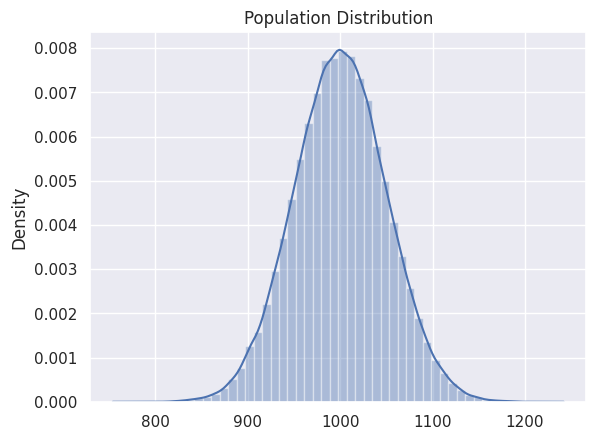

In [ ]:
sns.distplot(pop, bins = 50, hist = True, kde = True)
plt.title("Population Distribution")
plt.show()

In [ ]:
#take 10000, samples from the larger population
samps = pop[:10000]

In [ ]:
#time to use bootstrap for mean and stdev

BS_mean = bs.bootstrap(samps, stat_func=bs_stats.mean)

BS_stdev = bs.bootstrap(samps, stat_func=bs_stats.std)

In [ ]:
print("BootStrapped mean should be: {}".format(mean))
print('\t' + str(BS_mean))
print(" ")
print("BootStrapped stdev should be: {}".format(stdev))
print('\t' + str(BS_stdev))

BootStrapped mean should be: 1000
	999.88564545286    (998.9233143518547, 1000.8586924781921)
 
BootStrapped stdev should be: 50
	49.57907993897437    (48.90526646087055, 50.26394201095414)


In [ ]:
samp_amount = [10, 30, 50, 100, 500, 1000]

bootstrap_res = []

tdist_res = []

#for loop to handle our execution and iterations
for i in samp_amount:
  samps = np.random.choice(pop, i, replace=True)
  bsres = bs.bootstrap(samps, stat_func=bs_stats.mean, alpha = 0.05)

  tres = st.t.interval(0.95, len(samps)-1, loc = np.mean(samps), scale = st.sem(samps))

  bootstrap_res.append((bsres.lower_bound, bsres.upper_bound))
  tdist_res.append(tres)

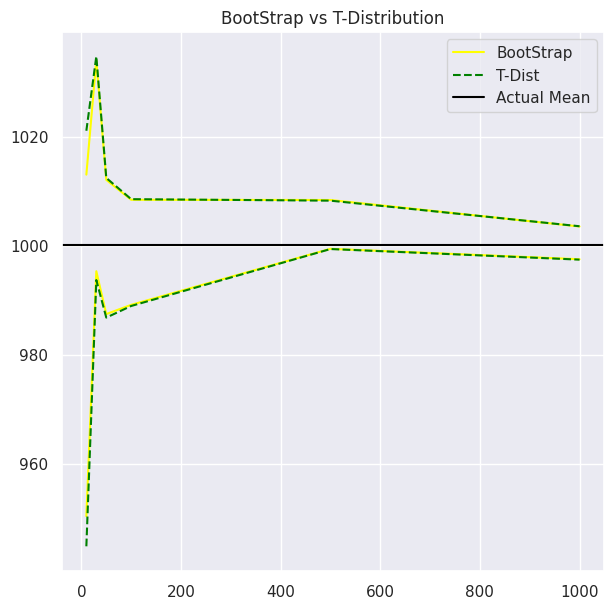

In [ ]:
plt.subplots(figsize=(7,7))

plt.plot(samp_amount, [x[1] for x in bootstrap_res], color = "yellow")
plt.plot(samp_amount, [x[1] for x in tdist_res], linestyle="--", color = "green")

plt.plot(samp_amount, [x[0] for x in bootstrap_res], color = "yellow", label = "BootStrap")
plt.plot(samp_amount, [x[0] for x in tdist_res], linestyle="--", color = "green", label = "T-Dist")

plt.axhline(pop.mean(), color = "black", label = "Actual Mean")
plt.legend(loc = "best")
plt.title("BootStrap vs T-Distribution")
plt.show()